# Description of Dataset

**IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. It consists of a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So,we have to predict the number of positive and negative reviews using either classification or deep learning algorithms.So here we will use BERT and train it for classifying reviews as positive/negative correctly.**

![image.png](attachment:image.png)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# LOADING THE NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet


import keras
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras import backend as K
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM,Dense,Bidirectional,Input
from keras.models import Model
import torch
import transformers

In [3]:
import re
from typing import Union, List

class CleanText():
    """ clearing text except digits () . , word character """

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text

def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

clean = CleanText()


In [4]:
# label encode
def label_encode(x):
    if x == 1 or x == 2:
        return 0
    if x == 3:
        return 1
    if x == 5 or x == 4:
        return 2

# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"


# IMPORTING THE DATASET

In [7]:
from google.colab import files
uploaded = files.upload()

Saving tripadvisor_hotel_reviews.csv to tripadvisor_hotel_reviews.csv


In [8]:
df = pd.read_csv("tripadvisor_hotel_reviews.csv")
df.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

from matplotlib import pyplot as plt
_df_0['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Rating', y='Review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# DATA VISUALIZATION AND PREPROCESSING

In [9]:
df.describe()

Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000

In [10]:
sample_df=df.sample(n=5000)
sample_df.describe()

Rating
count  5000.000000
mean      3.979600
std       1.234297
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000

In [11]:
df=sample_df

In [12]:
# count of ratings
fig = px.histogram(df,
             x = 'Rating',
             title = 'Histogram of Review Rating',
             template = 'ggplot2',
             color = 'Rating',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

In [13]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 5108 to 12989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  5000 non-null   object
 1   Rating  5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 117.2+ KB


In [14]:
# encode label and mapping label name
df["sentiment"] = df["Rating"].apply(lambda x: label_encode(x))
df["label_name"] = df["sentiment"].apply(lambda x: label2name(x))

In [15]:
# clean text, lowercase and remove punk
df["Review"] = df["Review"].apply(lambda x: remove_punct(clean(remove_emoji(x).lower())[0][0]))

In [16]:
df.head()

Review  Rating  sentiment  \
5108   3rd wedding anniversary celebrating 3rd weddin...       3          1   
12336  downtown charm simpsons hotel provides perfect...       5          2   
13114  great resort mom arrival punta cana got little...       4          2   
5860   really great hotel  reading reviews booking de...       5          2   
12775  great views great stay stayed millenium hilton...       5          2   

      label_name  
5108     Neutral  
12336   Positive  
13114   Positive  
5860    Positive  
12775   Positive

<Axes: xlabel='count', ylabel='label_name'>

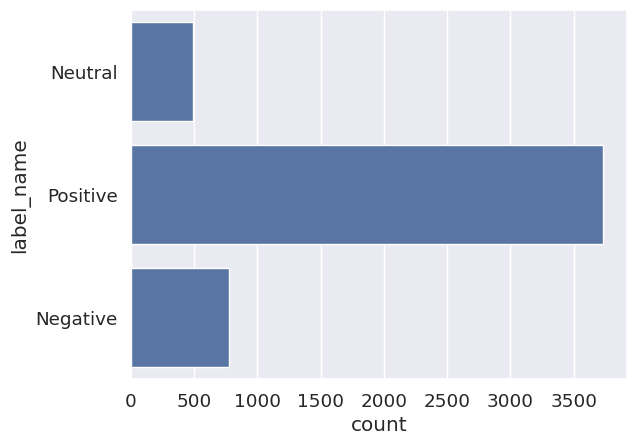

In [17]:
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(df.label_name)

**SO, WE CAN SEE THAT THE DATASET IS BALANCED**

In [18]:
df.isna().sum() # Checking for any missing values

Review        0
Rating        0
sentiment     0
label_name    0
dtype: int64

**WHAT ARE STOPWORDS?**

**Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus. We first download it to our python environment.**

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

**BASIC DATA CLEANING**

In [21]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['Review']=df['Review'].apply(denoise_text)

In [22]:
df.head()

Review  Rating  sentiment  \
5108   wedding anniversary celebrating wedding annive...       3          1   
12336  downtown charm simpsons hotel provides perfect...       5          2   
13114  great resort mom arrival punta cana got little...       4          2   
5860   really great hotel reading reviews booking del...       5          2   
12775  great views great stay stayed millenium hilton...       5          2   

      label_name  
5108     Neutral  
12336   Positive  
13114   Positive  
5860    Positive  
12775   Positive

**WORDCLOUD FOR POSITIVE TEXT (LABEL - 1)**

In [23]:
sns.set(style = "white" , font_scale = 1.2)

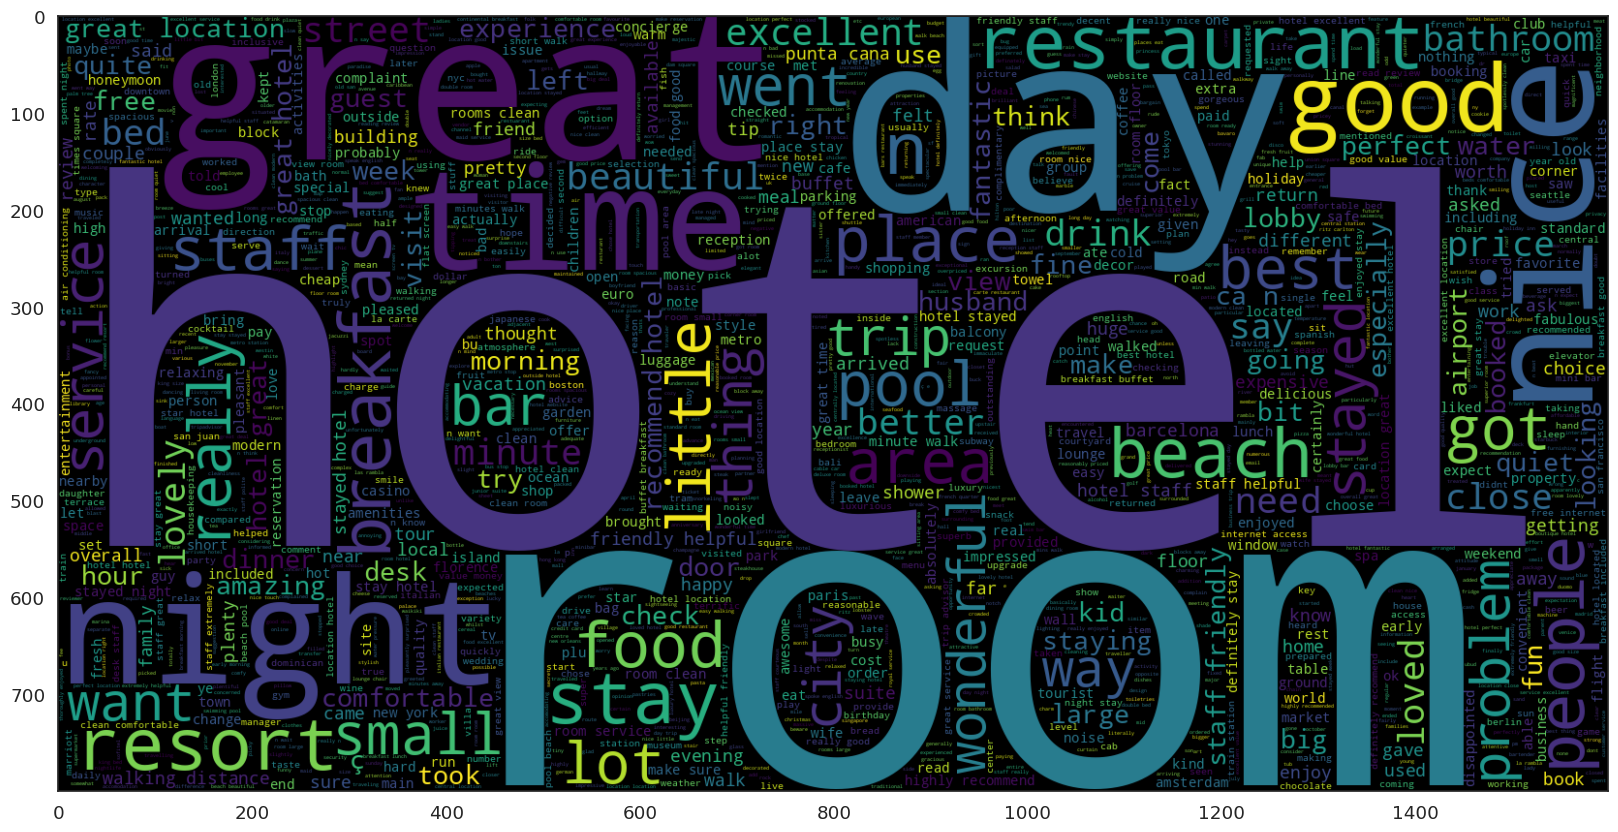

In [24]:
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 2].Review))
plt.imshow(wc , interpolation = 'bilinear')

**WORDCLOUD FOR NEGATIVE TEXT (LABEL - 0)**

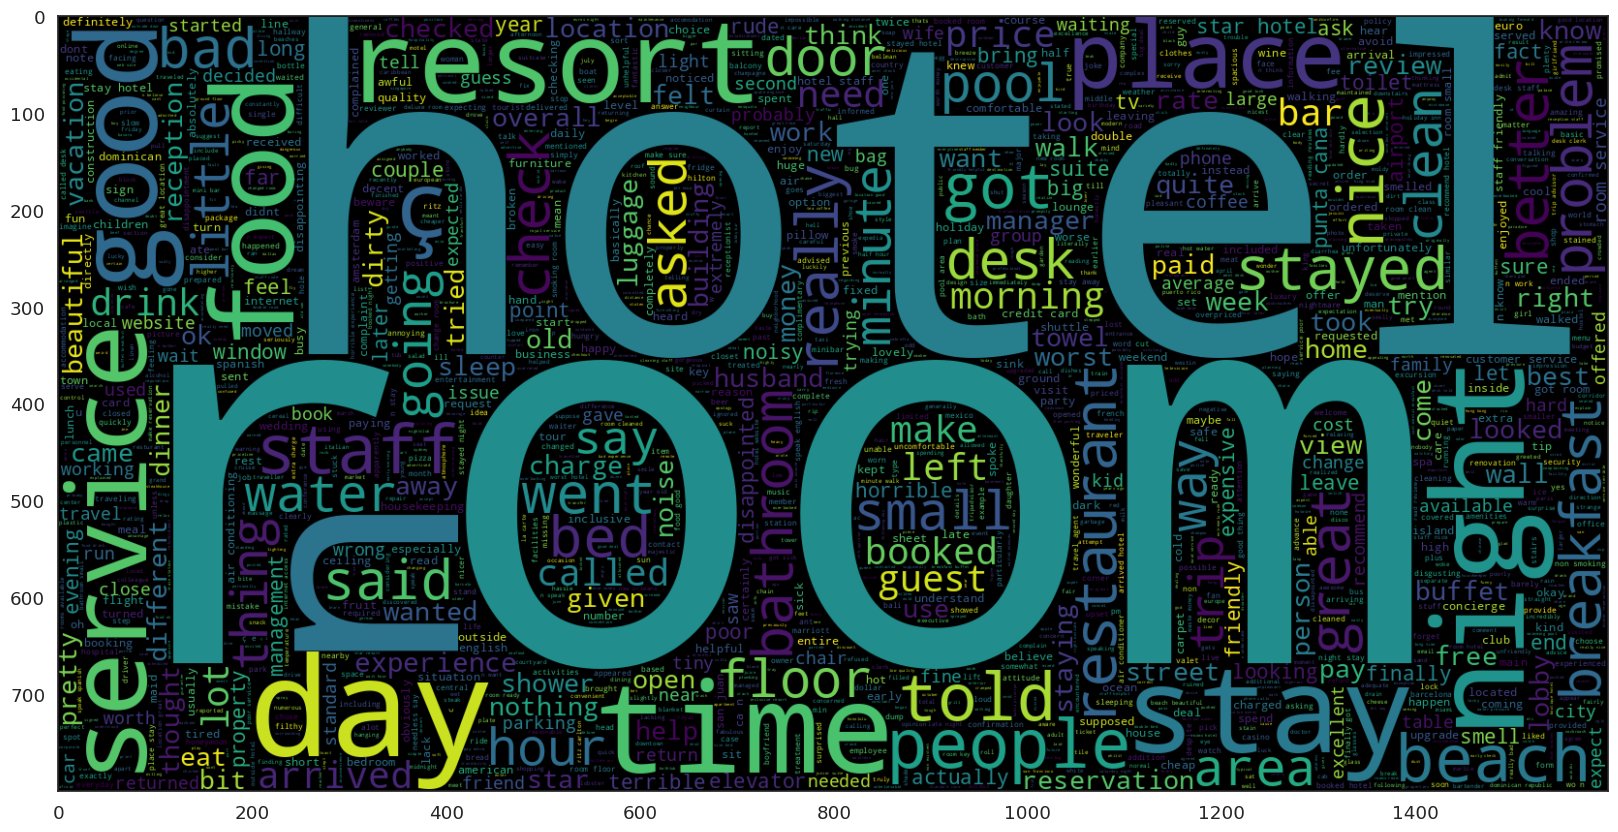

In [25]:
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 0].Review))
plt.imshow(wc , interpolation = 'bilinear')

**WORDCLOUD FOR NEUTRAL TEXT (LABEL - 1)**

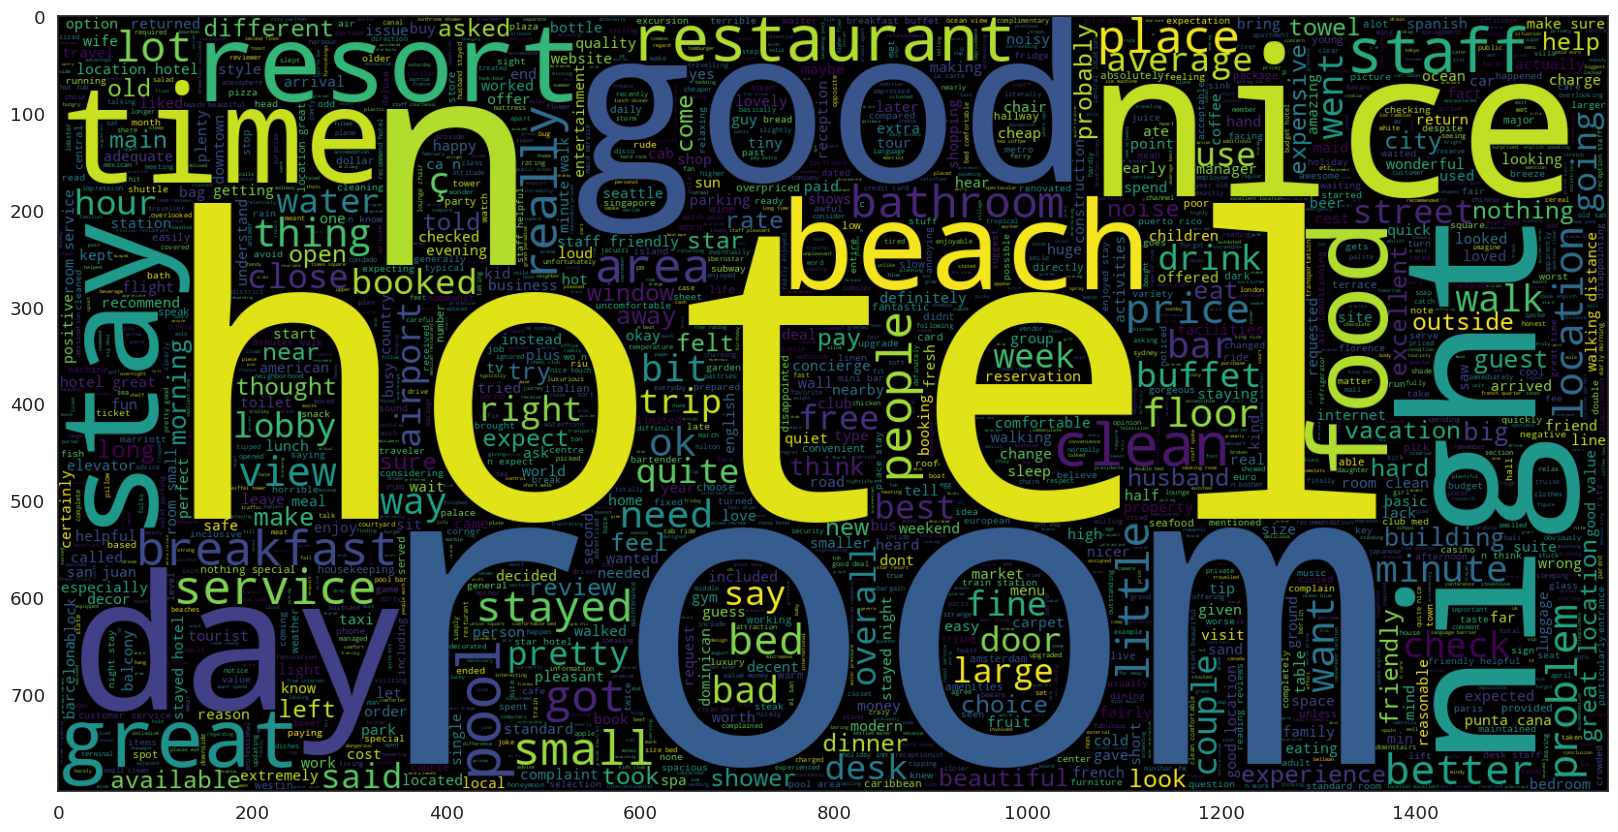

In [26]:
plt.figure(figsize = (20,20)) # Neutral Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 1].Review))
plt.imshow(wc , interpolation = 'bilinear')

**Number of characters in texts**

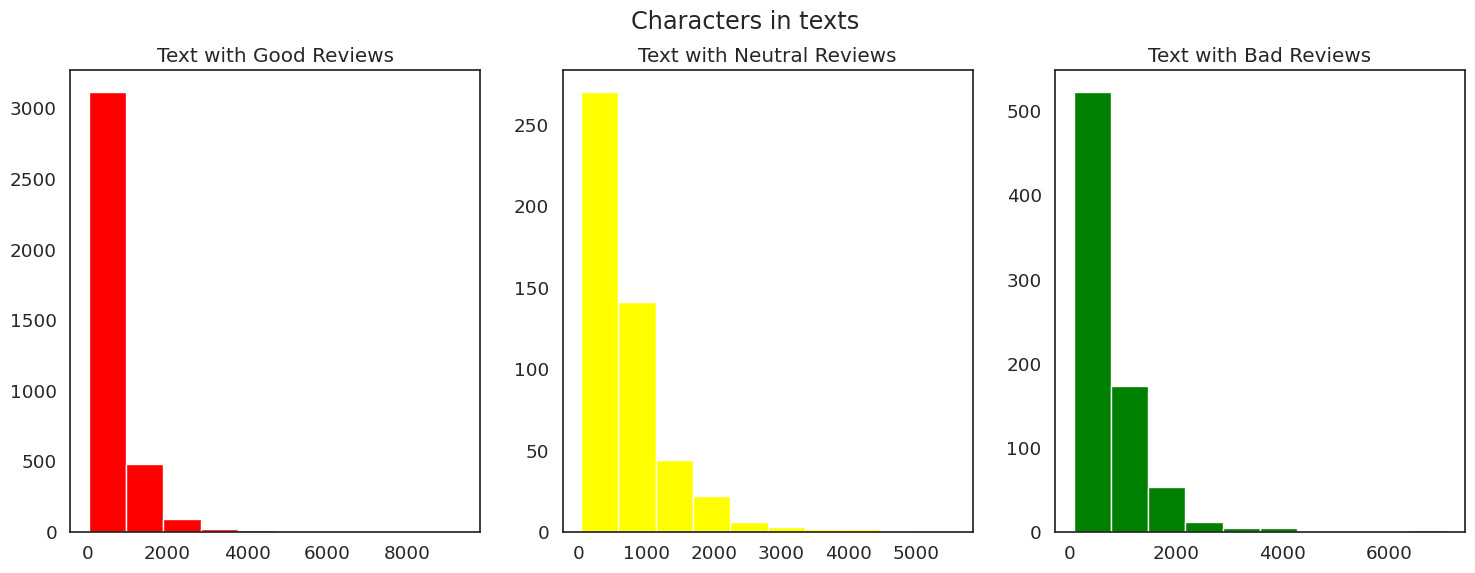

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
text_len=df[df['sentiment']==2]['Review'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Text with Good Reviews')
text_len=df[df['sentiment']==1]['Review'].str.len()
ax2.hist(text_len,color='yellow')
ax2.set_title('Text with Neutral Reviews')
text_len=df[df['sentiment']==0]['Review'].str.len()
ax3.hist(text_len,color='green')
ax3.set_title('Text with Bad Reviews')
fig.suptitle('Characters in texts')
plt.show()

**Number of words in each text**

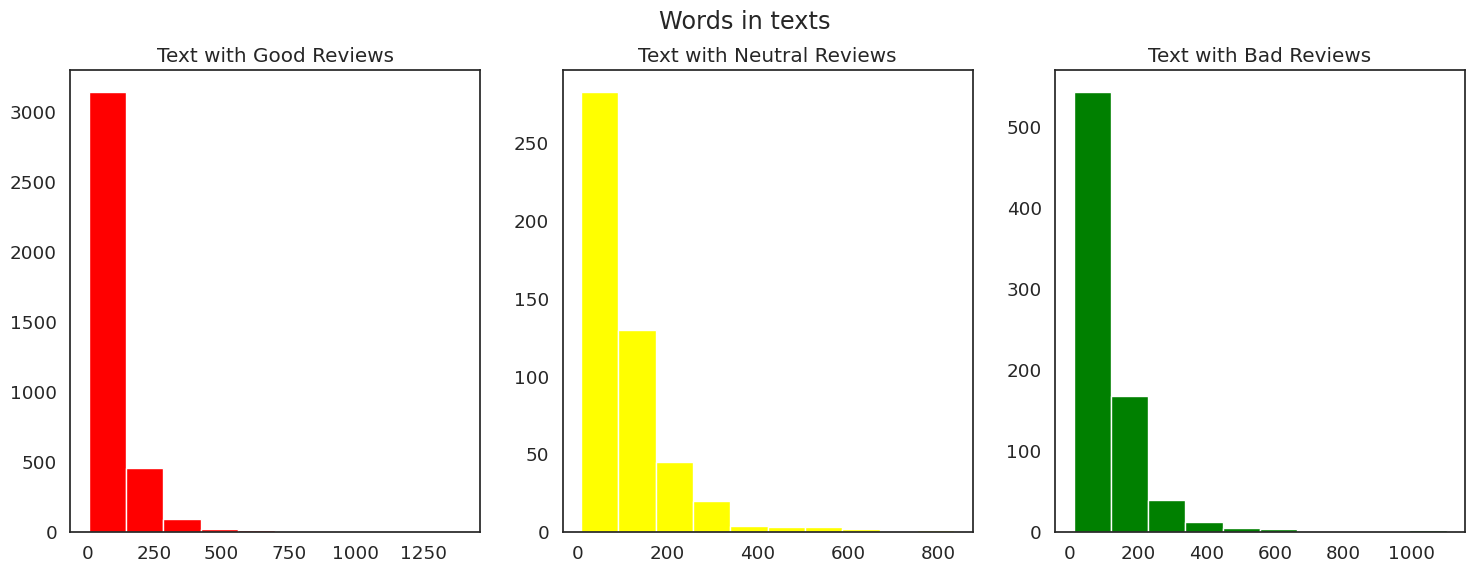

In [28]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))
text_len=df[df['sentiment']==2]['Review'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Text with Good Reviews')
text_len=df[df['sentiment']==1]['Review'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='yellow')
ax2.set_title('Text with Neutral Reviews')
text_len=df[df['sentiment']==0]['Review'].str.split().map(lambda x: len(x))
ax3.hist(text_len,color='green')
ax3.set_title('Text with Bad Reviews')
fig.suptitle('Words in texts')
plt.show()

**Average word length in a text**

<ipython-input-29-3b6f1342c4e4>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-29-3b6f1342c4e4>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-29-3b6f1342c4e4>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

Text(0.5, 0.98, 'Average word length in each text')

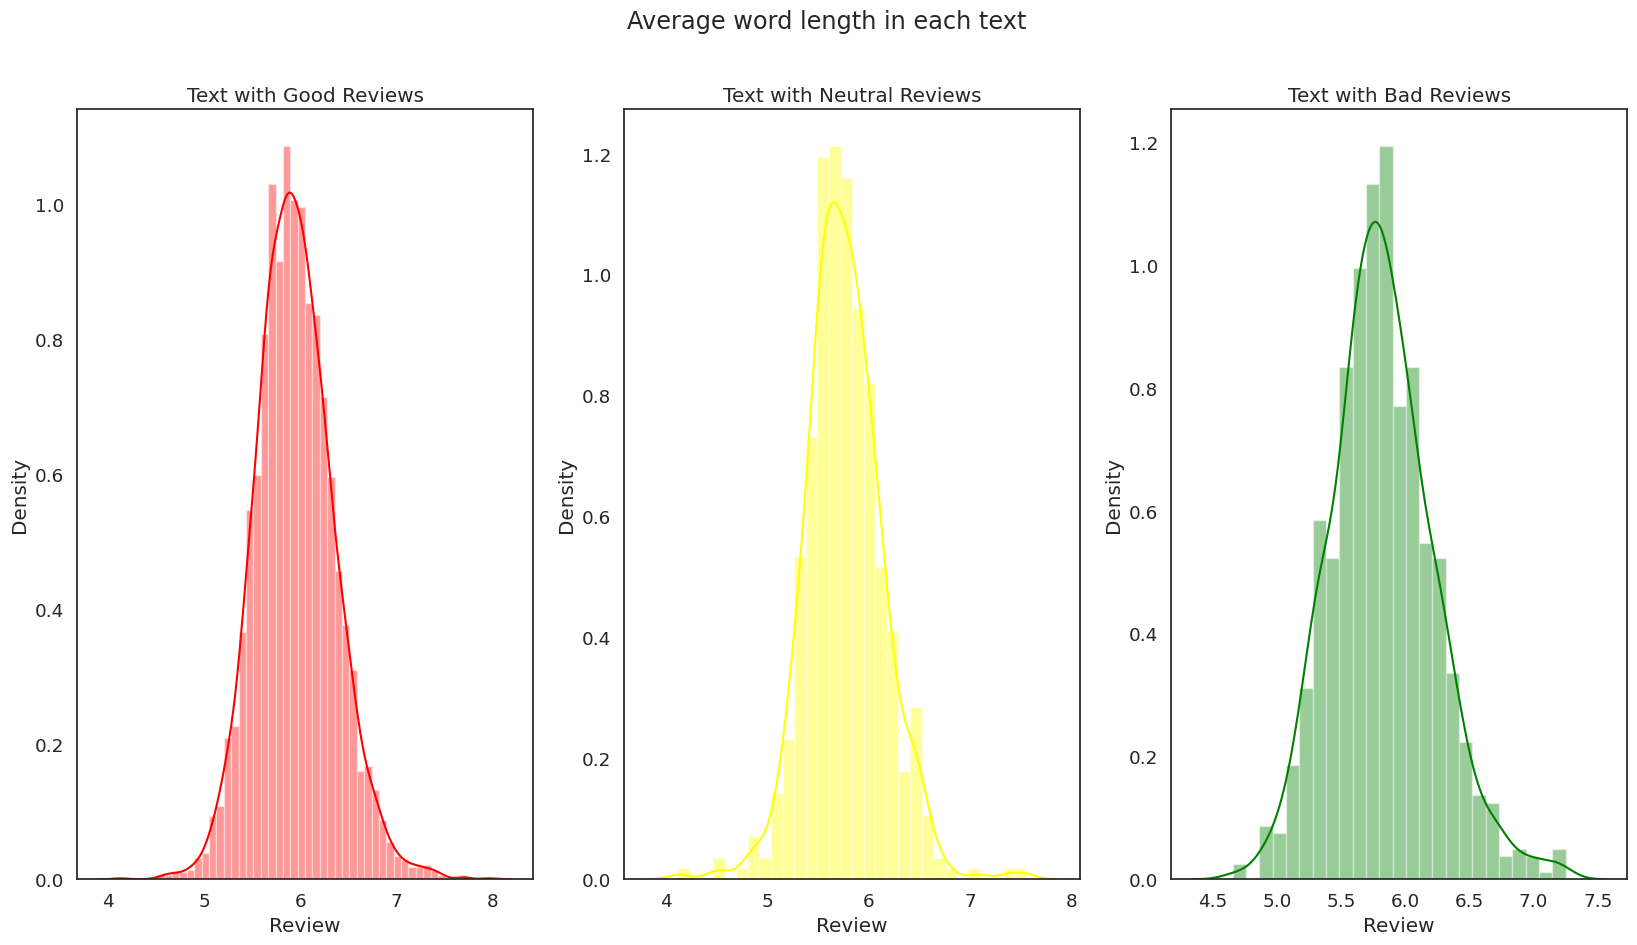

In [29]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,10))
word=df[df['sentiment']==2]['Review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Text with Good Reviews')
word=df[df['sentiment']==1]['Review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='yellow')
ax2.set_title('Text with Neutral Reviews')
word=df[df['sentiment']==0]['Review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='green')
ax3.set_title('Text with Bad Reviews')
fig.suptitle('Average word length in each text')

In [30]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.Review)
corpus[:5]

['wedding', 'anniversary', 'celebrating', 'wedding', 'anniversary']

In [31]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'hotel': 12319,
 'room': 8696,
 'great': 5363,
 'n': 4727,
 'good': 4081,
 'staff': 4027,
 'stay': 3769,
 'nice': 3090,
 'rooms': 3023,
 'location': 2861}

In [32]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

**Unigram Analysis**

In [33]:
most_common_uni = get_top_text_ngrams(df.Review,20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

**Bigram Analysis**

In [34]:
most_common_bi = get_top_text_ngrams(df.Review,20,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Bigrams in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

**Trigram Analysis**

In [35]:
most_common_tri = get_top_text_ngrams(df.Review,20,3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Trigrams in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [36]:
df.head()

Review  Rating  sentiment  \
5108   wedding anniversary celebrating wedding annive...       3          1   
12336  downtown charm simpsons hotel provides perfect...       5          2   
13114  great resort mom arrival punta cana got little...       4          2   
5860   really great hotel reading reviews booking del...       5          2   
12775  great views great stay stayed millenium hilton...       5          2   

      label_name  
5108     Neutral  
12336   Positive  
13114   Positive  
5860    Positive  
12775   Positive

# BERT WORKING

**BERT relies on a Transformer (the attention mechanism that learns contextual relationships between words in a text). A basic Transformer consists of an encoder to read the text input and a decoder to produce a prediction for the task. Since BERT’s goal is to generate a language representation model, it only needs the encoder part. The input to the encoder for BERT is a sequence of tokens, which are first converted into vectors and then processed in the neural network. But before processing can start, BERT needs the input to be massaged and decorated with some extra metadata:**

**1. Token embeddings: A [CLS] token is added to the input word tokens at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.**

**2. Segment embeddings: A marker indicating Sentence A or Sentence B is added to each token. This allows the encoder to distinguish between sentences.**

**3. Positional embeddings: A positional embedding is added to each token to indicate its position in the sentence.**

![image.png](attachment:image.png)

**Source Credits - https://towardsml.com/2019/09/17/bert-explained-a-complete-guide-with-theory-and-tutorial/**

# TRAINING THE MODEL

In [37]:
import torch

from tqdm.notebook import tqdm
pd.options.mode.chained_assignment = None

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [40]:
from transformers import BertForSequenceClassification

In [41]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [42]:
from transformers import AdamW, get_linear_schedule_with_warmup

In [43]:
from sklearn.metrics import f1_score

In [49]:
X_train, X_val, y_train, y_val = train_test_split(
    df.index.values,
    df.sentiment.values,
    test_size = 0.15,
    random_state = 17,
    stratify = df.sentiment.values
)

**Fast Encoding**

In [50]:
df['data_type'] = ['not_set']* df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

In [51]:
df.groupby(['label_name', 'sentiment', 'data_type']).count()

Review  Rating
label_name sentiment data_type                
Negative   0         train         658     658
                     val           116     116
Neutral    1         train         417     417
                     val            74      74
Positive   2         train        3175    3175
                     val           560     560

In [52]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning:

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.



config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [54]:
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type == 'train'].Review.values,
    add_special_tokens = True,
    return_attention_mask = True,
    pad_to_max_length = True,
    max_length = 256,
    return_tensors = 'pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type == 'val'].Review.values,
    add_special_tokens = True,
    return_attention_mask = True,
    pad_to_max_length = True,
    max_length = 256,
    return_tensors = 'pt'
)

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type == 'train'].sentiment.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type == 'val'].sentiment.values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [55]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [58]:
possible_labels = df.label_name.unique()

In [59]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [60]:
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels = len(label_dict),
    output_attentions = False,
    output_hidden_states = False
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [61]:
batch_size = 4 #32
dataloader_train = DataLoader(
    dataset_train,
    sampler = RandomSampler(dataset_train),
    batch_size = batch_size
)

dataloader_val = DataLoader(
    dataset_val,
    sampler = SequentialSampler(dataset_val),
    batch_size = 32
)

In [62]:
optimizer = AdamW(
    model.parameters(),
    lr = 1e-5, #2e-5 to 5e-5
    eps = 1e-8
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



In [63]:
epochs = 10
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps = 0,
    num_training_steps = len(dataloader_train)*epochs
)

In [64]:
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis = 1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average="weighted")

In [65]:
def accuracy_per_class(preds, labels):
    labels_dict_inverse = {v: k for k,v in label_dict.items()}
    preds_flat = np.argmax(preds, axis = 1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat == label]
        y_true = labels_flat[labels_flat == label]
        print('Class: {}'.format(labels_dict_inverse[label]))
        print('Accuracy: {}\n'.format( len(y_preds[y_preds == label]) / len(y_true)) )

In [66]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [67]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [68]:
def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in tqdm(dataloader_val):

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [69]:
for epoch in tqdm(range(1, epochs+1)):
    model.train()

    loss_train_total = 0
    progress_bar = tqdm(dataloader_train,
                        desc="Epoch {:1d}".format(epoch),
                        leave=False,
                        disable=False)

    for batch in progress_bar:
        model.zero_grad()
        batch = tuple(b.to(device) for b in batch)
        inputs = {
            'input_ids'       : batch[0],
            'attention_mask'  : batch[1],
            'labels'          : batch[2]
        }

        outputs = model(**inputs)
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix( {'training_loss': '{:3f}'.format(loss.item() / len(batch))} )

    torch.save(model.state_dict(), f'_BERT_epoch_{epoch}.model')
    tqdm.write('\nEpoch {epoch}')

    loss_train_avg = loss_train_total / len(dataloader_train)
    tqdm.write('Training loss: {}'.format(loss_train_avg))

    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)

    tqdm.write('Validation loss: {}'.format(val_loss))
    tqdm.write('f1 score (weighted): {}'.format(val_f1))

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1063 [00:00<?, ?it/s]

<ipython-input-69-0bc3928aef72>:24: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training loss: 0.567218033310818


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 0.4251154555628697
f1 score (weighted): 0.8587739714001735


Epoch 2:   0%|          | 0/1063 [00:00<?, ?it/s]

<ipython-input-69-0bc3928aef72>:24: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training loss: 0.43089333996842577


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 0.5683159697800875
f1 score (weighted): 0.8416163813789794


Epoch 3:   0%|          | 0/1063 [00:00<?, ?it/s]

<ipython-input-69-0bc3928aef72>:24: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training loss: 0.33270251265517153


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 0.6358173706879219
f1 score (weighted): 0.8574806899916275


Epoch 4:   0%|          | 0/1063 [00:00<?, ?it/s]

<ipython-input-69-0bc3928aef72>:24: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training loss: 0.24916059021145978


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 0.7091092951595783
f1 score (weighted): 0.8549476024082099


Epoch 5:   0%|          | 0/1063 [00:00<?, ?it/s]

<ipython-input-69-0bc3928aef72>:24: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training loss: 0.1717014933592637


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 0.8266577571630478
f1 score (weighted): 0.864819982568424


Epoch 6:   0%|          | 0/1063 [00:00<?, ?it/s]

<ipython-input-69-0bc3928aef72>:24: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training loss: 0.10574935327457155


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 0.8788315517206987
f1 score (weighted): 0.8658886982492063


Epoch 7:   0%|          | 0/1063 [00:00<?, ?it/s]

<ipython-input-69-0bc3928aef72>:24: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training loss: 0.07207532850192594


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 1.0761646355191867
f1 score (weighted): 0.8574784152208942


Epoch 8:   0%|          | 0/1063 [00:00<?, ?it/s]

<ipython-input-69-0bc3928aef72>:24: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training loss: 0.047826751936699094


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 1.0164436375101407
f1 score (weighted): 0.8601605687830164


Epoch 9:   0%|          | 0/1063 [00:00<?, ?it/s]

<ipython-input-69-0bc3928aef72>:24: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training loss: 0.03892277831396344


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 1.0297691952437162
f1 score (weighted): 0.8675496010799265


Epoch 10:   0%|          | 0/1063 [00:00<?, ?it/s]

<ipython-input-69-0bc3928aef72>:24: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training loss: 0.01766457207283094


  0%|          | 0/24 [00:00<?, ?it/s]

Validation loss: 1.0526525701085727
f1 score (weighted): 0.8668288224592364


In [70]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [71]:
model.load_state_dict(
    torch.load(f'./_BERT_epoch_10.model',
              map_location=torch.device('cuda:0'))
)

<All keys matched successfully>

In [88]:
from sklearn.metrics import classification_report

preds_flat = np.argmax(predictions, axis=1).flatten()
print(classification_report(preds_flat, true_vals))
report_dict=classification_report(preds_flat, true_vals, output_dict = True)

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       102
           1       0.45      0.44      0.44        75
           2       0.95      0.93      0.94       573

    accuracy                           0.87       750
   macro avg       0.71      0.73      0.72       750
weighted avg       0.87      0.87      0.87       750



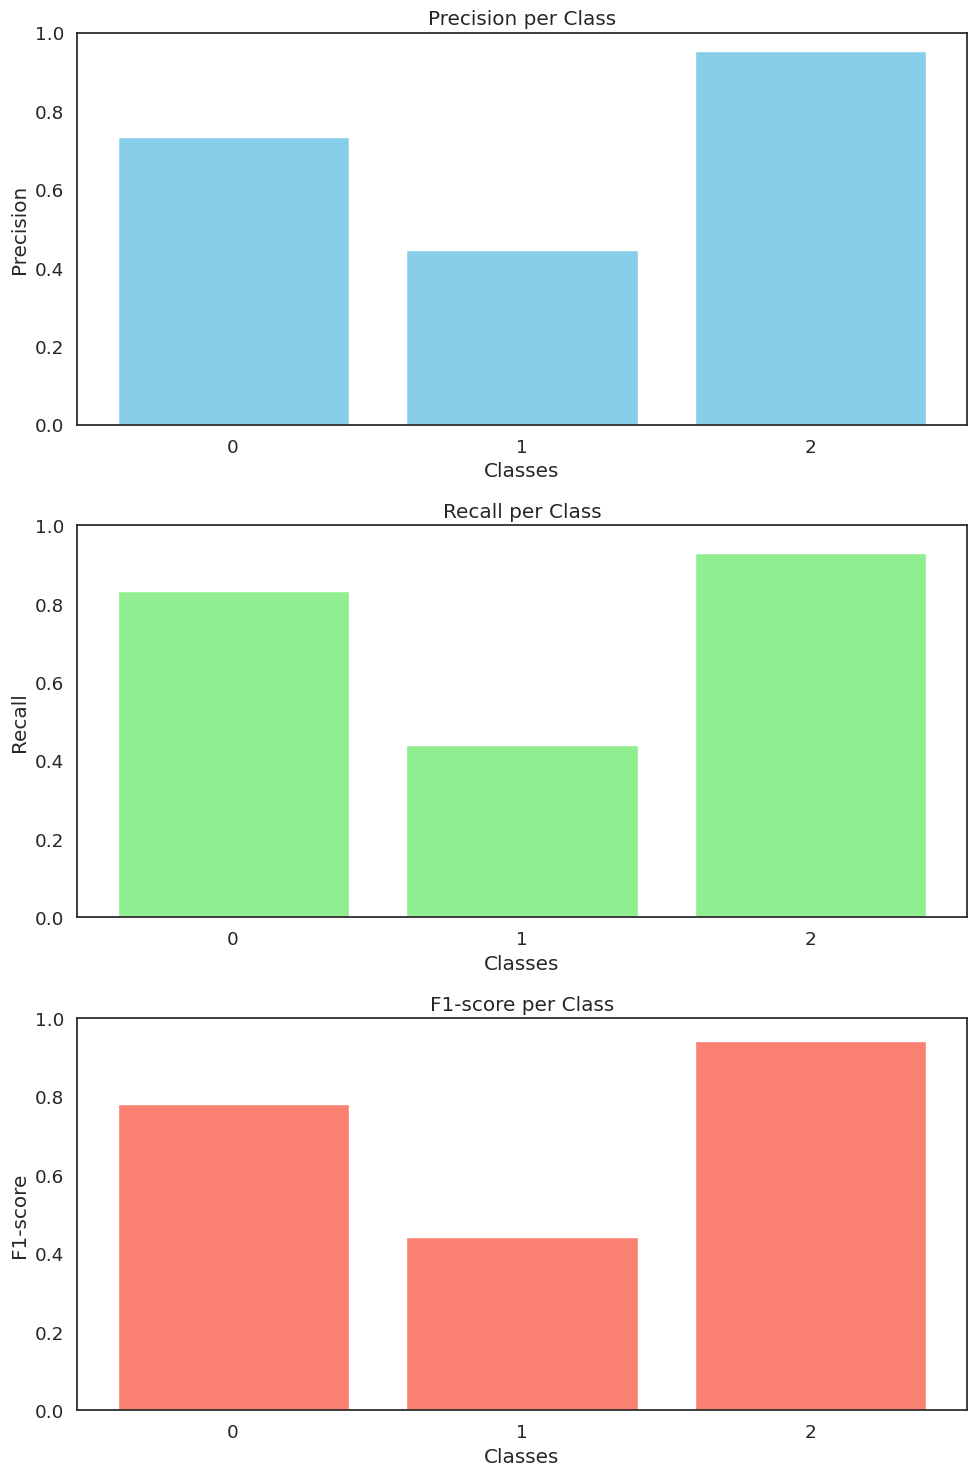

In [97]:
report_df = pd.DataFrame(report_dict).transpose()
# Drop the support column (optional)
report_df = report_df.drop(columns=['support'])
report_df.head()

report_df = report_df.drop(index=['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

metrics = ['precision', 'recall', 'f1-score']
colors = ['skyblue', 'lightgreen', 'salmon']

for i, metric in enumerate(metrics):
    if metric in report_df.columns:  # Check if the metric exists for all classes
        ax[i].bar(report_df.index, report_df[metric], color=colors[i])
        ax[i].set_title(f'{metric.capitalize()} per Class')
        ax[i].set_xlabel('Classes')
        ax[i].set_ylabel(metric.capitalize())
        ax[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# ANALYSIS AFTER TRAINING OF MODEL

In [116]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Định dạng câu văn bạn muốn dự đoán
sentence = "This is amazing."

# Tiền xử lý câu văn
inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=128)
input_ids = inputs["input_ids"]
attention_mask = inputs["attention_mask"]

# Dự đoán
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)

# Lấy dự đoán
predictions = torch.argmax(outputs.logits, dim=1).item()
print("Predicted label:", predictions)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted label: 2


In [ ]:
pred = model.predict(x_test)
pred[:5]

In [ ]:
pred = np.round(pred).astype(int)
pred[:5]

In [ ]:
print(classification_report(y_test, pred, target_names = ['Bad Reviews','Good Reviews']))

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Bad Reviews','Good Reviews'] , yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

**PLS UPVOTE THIS NOTEBOOK IF YOU LIKE IT! THANKS FOR YOUR TIME !**